In [1]:
import numpy as np
import  plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df=pd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-01.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.99,40.73,1,N,-73.98,40.73,2,7.50,0.50,0.50,0.00,0.00,0.30,8.80
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.98,40.73,1,N,-73.94,40.72,1,18.00,0.50,0.50,0.00,0.00,0.30,19.30
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.98,40.68,1,N,-73.95,40.79,1,33.00,0.50,0.50,0.00,0.00,0.30,34.30
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.99,40.72,1,N,-73.96,40.66,2,16.50,0.00,0.50,0.00,0.00,0.30,17.30
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.96,40.78,1,N,-73.98,40.76,2,8.00,0.00,0.50,0.00,0.00,0.30,8.80


In [3]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [4]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [5]:
ratecode_mapping = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated fare",
    6: "Group ride"
}

df['RatecodeID']=df['RatecodeID'].map(ratecode_mapping)
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                       object
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [6]:
payment_type_mapping = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

df['payment_type']=df['payment_type'].map(payment_type_mapping)
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                       object
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01,2016-01-01,2,1.10,-73.99,40.73,Standard rate,N,-73.98,40.73,Cash,7.50,0.50,0.50,0.00,0.00,0.30,8.80
1,2,2016-01-01,2016-01-01,5,4.90,-73.98,40.73,Standard rate,N,-73.94,40.72,Credit card,18.00,0.50,0.50,0.00,0.00,0.30,19.30
2,2,2016-01-01,2016-01-01,1,10.54,-73.98,40.68,Standard rate,N,-73.95,40.79,Credit card,33.00,0.50,0.50,0.00,0.00,0.30,34.30
3,2,2016-01-01,2016-01-01,1,4.75,-73.99,40.72,Standard rate,N,-73.96,40.66,Cash,16.50,0.00,0.50,0.00,0.00,0.30,17.30
4,2,2016-01-01,2016-01-01,3,1.76,-73.96,40.78,Standard rate,N,-73.98,40.76,Cash,8.00,0.00,0.50,0.00,0.00,0.30,8.80


# Answering the Data Analysis Question

## 1. What are the total number of rows and columns in the dataset?  

In [8]:
print(f'Shape of the Dataframe {df.shape}')

Shape of the Dataframe (10906858, 19)


## 2. Are there any missing values in the dataset? If yes, identify the columns with missing values.


In [9]:
df.isna().sum()

VendorID                   0
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count            0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
RatecodeID               216
store_and_fwd_flag         0
dropoff_longitude          0
dropoff_latitude           0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
dtype: int64

In [10]:
df=df.dropna()
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

So RatecodeID had 216 null values.
Dropping those value is a good decision as there are more than 10 million values.

## 3. What is the average, minimum, and maximum trip distance (`trip_distance`) for all the trips?  

In [11]:
avg_trip=df['trip_distance'].mean()
min_trip=df['trip_distance'].min()
max_trip=df['trip_distance'].max()

In [12]:
print('Mean trip distance: ',avg_trip)
print('Minimum trip distance : ',min_trip)
print('Maximum trip distance : ',max_trip)

Mean trip distance:  4.648251800141593
Minimum trip distance :  0.0
Maximum trip distance :  8000010.0


In [13]:
df=df[df['trip_distance']<100]
df['trip_distance'].max()

99.3

In [14]:
print('Number of rows now ',df.shape)

Number of rows now  (10906557, 19)


So as given above a maximum trip distance was 8000010 miles which is impossible and there might be another errors in the records. So limiting the trip between 0 to 100 miles is a reasonabble choice.

## 4. What is the total `total_amount` collected for the month of January 2016?

In [15]:
print(f"Total money collected in January is {df['total_amount'].sum()} $. ")

Total money collected in January is 170575303.75000018 $. 


## 5. What day of the week recorded the highest number of trips?  

In [16]:
counts=df['tpep_pickup_datetime'].dt.day_name()
counts.value_counts().reset_index()

,tpep_pickup_datetime,count
0,Friday,1972540
1,Saturday,1644018
2,Sunday,1555059
3,Thursday,1544312
4,Wednesday,1484851
5,Tuesday,1423424
6,Monday,1282353


Most of the trips happened on Friday.

## 6. What hour of the day had the maximum `total_amount` collected?  

In [17]:
tot_day=df.groupby(df['tpep_pickup_datetime'].dt.hour)['total_amount'].sum().reset_index()
tot_day.sort_values('total_amount',ascending=False)

,tpep_pickup_datetime,total_amount
18,18,"10,570,892.79"
19,19,"10,288,136.70"
20,20,"9,674,195.10"
21,21,"9,641,385.24"
17,17,"9,468,187.81"
22,22,"9,452,603.45"
14,14,"9,022,123.69"
15,15,"8,934,104.96"
16,16,"8,380,751.24"
13,13,"8,121,146.69"


At 6:00 PM, the collection was highest of 10570892.79 $.

## 7. Calculate the total `fare_amount` collected for each weekdays.

In [18]:
df.groupby(df['tpep_pickup_datetime'].dt.day_name())['fare_amount'].sum().reset_index().rename(columns={'tpep_pickup_datetime':'Day'})

,Day,fare_amount
0,Friday,"24,641,779.53"
1,Monday,"16,378,316.41"
2,Saturday,"19,754,508.70"
3,Sunday,"19,374,295.89"
4,Thursday,"19,479,796.11"
5,Tuesday,"18,049,157.76"
6,Wednesday,"18,495,601.85"


## 8. What is the average `total_amount` collected per passenger (`passenger_count`)?  

In [19]:
df.groupby(df['passenger_count'])['total_amount'].mean().reset_index().rename(columns={'total_amount':'mean_total_amount'}).sort_values('mean_total_amount')

,passenger_count,mean_total_amount
6,6,15.43
1,1,15.48
5,5,15.75
3,3,15.81
4,4,15.90
2,2,16.32
0,0,26.62
9,9,36.93
7,7,46.70
8,8,54.72


## 9. Find the maximum `trip_distance` for trips with only 1 passenger.

In [20]:
max_dis=df[df['passenger_count']==1.0]['trip_distance'].max()
max_dis

99.16

Maximum trip distance with 1 passenger is 99.16 .

## 10. What is the percentage of trips where the `RatecodeID` was "Standard rate"? 

In [21]:
cnt_rid=df['RatecodeID'].value_counts().reset_index()
cnt_rid

,RatecodeID,count
0,Standard rate,10626270
1,JFK,225006
2,Negotiated fare,33669
3,Newark,16820
4,Nassau or Westchester,4690
5,Group ride,102


In [22]:
standard_rate_count = cnt_rid.loc[cnt_rid['RatecodeID'] == 'Standard rate', 'count'].values[0]

In [23]:
per_sr=standard_rate_count/cnt_rid['count'].sum()
print(f'A big {round(per_sr*100,3)} % of total trip are of RatecodeID having "Standasd rate".')

A big 97.43 % of total trip are of RatecodeID having "Standasd rate".


## 11. Identify the most common pickup (`pickup_longitude`, `pickup_latitude`) and dropoff locations (`dropoff_longitude`, `dropoff_latitude`)

In [24]:
df['pickup_point']=list(zip(df['pickup_longitude'],df['pickup_latitude']))
df['dropoff_point']=list(zip(df['dropoff_longitude'],df['dropoff_latitude']))

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point
0,2,2016-01-01,2016-01-01,2,1.10,-73.99,40.73,Standard rate,N,-73.98,...,Cash,7.50,0.50,0.50,0.00,0.00,0.30,8.80,"(-73.99037170410156, 40.73469543457031)","(-73.98184204101561, 40.73240661621094)"
1,2,2016-01-01,2016-01-01,5,4.90,-73.98,40.73,Standard rate,N,-73.94,...,Credit card,18.00,0.50,0.50,0.00,0.00,0.30,19.30,"(-73.98078155517578, 40.72991180419922)","(-73.94447326660156, 40.716678619384766)"
2,2,2016-01-01,2016-01-01,1,10.54,-73.98,40.68,Standard rate,N,-73.95,...,Credit card,33.00,0.50,0.50,0.00,0.00,0.30,34.30,"(-73.98455047607422, 40.6795654296875)","(-73.95027160644531, 40.78892517089844)"
3,2,2016-01-01,2016-01-01,1,4.75,-73.99,40.72,Standard rate,N,-73.96,...,Cash,16.50,0.00,0.50,0.00,0.00,0.30,17.30,"(-73.99346923828125, 40.71899032592773)","(-73.96224212646483, 40.65733337402344)"
4,2,2016-01-01,2016-01-01,3,1.76,-73.96,40.78,Standard rate,N,-73.98,...,Cash,8.00,0.00,0.50,0.00,0.00,0.30,8.80,"(-73.96062469482422, 40.78133010864258)","(-73.97726440429686, 40.75851440429688)"


In [25]:
pickup_val_count=df['pickup_point'].value_counts().reset_index()

In [26]:
pickup_val_count

,pickup_point,count
0,"(0.0, 0.0)",170117
1,"(-73.95466613769531, 40.82100296020508)",1022
2,"(-73.86331939697266, 40.769485473632805)",514
3,"(-73.79402923583984, 40.65670776367188)",123
4,"(-73.87445831298828, 40.774051666259766)",91
...,...,...
8211248,"(-73.97862243652342, 40.7616081237793)",1
8211249,"(-73.98719787597656, 40.71810150146485)",1
8211250,"(-73.97550964355469, 40.74918365478516)",1
8211251,"(-73.99586486816406, 40.723438262939446)",1


#### **As we see above, the coordination of (0,0) is the highest count, but as we know, this is not possible. It might be an error or simplt the default value when nothing is entered.**
#### **So the highest recorded coordination is (-73.95466613769531, 40.82100296020508).**

In [27]:
dropoff_val_count=df['dropoff_point'].value_counts().reset_index()
dropoff_val_count

,dropoff_point,count
0,"(0.0, 0.0)",160122
1,"(-73.95466613769531, 40.82100296020508)",1022
2,"(-73.86331939697266, 40.769485473632805)",502
3,"(-73.79402923583984, 40.65670776367188)",123
4,"(-73.96461486816406, 40.76420211791992)",75
...,...,...
9113425,"(-73.99748992919923, 40.75717926025391)",1
9113426,"(-73.87501525878906, 40.670795440673835)",1
9113427,"(-73.98075866699219, 40.762710571289055)",1
9113428,"(-73.97840881347656, 40.75092315673828)",1


#### **Same happens with the dropoff point and the highest number of dropoff point is (-73.95466613769531, 40.82100296020508).**

## 12. What is the distribution of `payment_type`?  

In [28]:
pt_cnt=df['payment_type'].value_counts().reset_index()
pt_cnt

,payment_type,count
0,Credit card,7181313
1,Cash,3673562
2,No charge,38273
3,Dispute,13408
4,Unknown,1


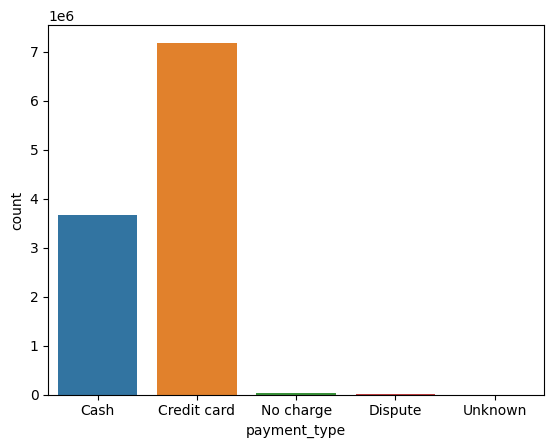

In [29]:
sns.countplot(data=df,x='payment_type')
plt.show()

## 13. Which `payment_type` had the highest average `tip_amount`?

In [30]:
df.groupby('payment_type')['tip_amount'].mean().reset_index()

,payment_type,tip_amount
0,Cash,0.00
1,Credit card,2.66
2,Dispute,-0.01
3,No charge,0.01
4,Unknown,0.00


#### So credit card had the highest average among all the payment type.

## 14. Calculate the total `fare_amount` for each day in January. Identify the day with the highest `fare_amount`.


In [31]:
day_fare=df.groupby(df['tpep_pickup_datetime'].dt.date)['fare_amount'].sum().reset_index().rename(columns={'tpep_pickup_datetime': 'Date'})
day_fare

,Date,fare_amount
0,2016-01-01,"4,435,598.28"
1,2016-01-02,"3,889,686.56"
2,2016-01-03,"3,956,039.47"
3,2016-01-04,"3,859,310.27"
4,2016-01-05,"4,119,053.18"
5,2016-01-06,"4,182,103.57"
6,2016-01-07,"4,423,030.00"
7,2016-01-08,"4,715,868.33"
8,2016-01-09,"4,703,859.98"
9,2016-01-10,"4,288,502.08"


In [32]:
day_fare.sort_values('fare_amount',ascending=False).head()

,Date,fare_amount
29,2016-01-30,"5,313,111.52"
28,2016-01-29,"5,256,977.80"
21,2016-01-22,"5,131,099.54"
14,2016-01-15,"5,102,235.58"
20,2016-01-21,"5,089,038.39"


#### **On 30th January, the fare amount was the highest among all the days in January.**

## 15. Calculate the trip duration (in minutes) for each trip and find the average trip duration for the dataset.  

In [33]:
trip_df=df.copy()

In [34]:
trip_df['trip_dur'] = (trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']).dt.total_seconds() / 60
trip_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point,trip_dur
0,2,2016-01-01,2016-01-01,2,1.10,-73.99,40.73,Standard rate,N,-73.98,...,7.50,0.50,0.50,0.00,0.00,0.30,8.80,"(-73.99037170410156, 40.73469543457031)","(-73.98184204101561, 40.73240661621094)",0.00
1,2,2016-01-01,2016-01-01,5,4.90,-73.98,40.73,Standard rate,N,-73.94,...,18.00,0.50,0.50,0.00,0.00,0.30,19.30,"(-73.98078155517578, 40.72991180419922)","(-73.94447326660156, 40.716678619384766)",0.00
2,2,2016-01-01,2016-01-01,1,10.54,-73.98,40.68,Standard rate,N,-73.95,...,33.00,0.50,0.50,0.00,0.00,0.30,34.30,"(-73.98455047607422, 40.6795654296875)","(-73.95027160644531, 40.78892517089844)",0.00
3,2,2016-01-01,2016-01-01,1,4.75,-73.99,40.72,Standard rate,N,-73.96,...,16.50,0.00,0.50,0.00,0.00,0.30,17.30,"(-73.99346923828125, 40.71899032592773)","(-73.96224212646483, 40.65733337402344)",0.00
4,2,2016-01-01,2016-01-01,3,1.76,-73.96,40.78,Standard rate,N,-73.98,...,8.00,0.00,0.50,0.00,0.00,0.30,8.80,"(-73.96062469482422, 40.78133010864258)","(-73.97726440429686, 40.75851440429688)",0.00


In [35]:
# Drop rows where trip_dur is greater than 1000
trip_df = trip_df[trip_df['trip_dur'] <= 1000]
trip_df = trip_df[trip_df['trip_dur'] > 0]
trip_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point,trip_dur
10906851,2,2016-01-31 22:53:00,2016-01-31 22:59:37,1,1.68,-74.00,40.75,Standard rate,N,-74.00,...,7.00,0.50,0.50,1.00,0.00,0.30,9.30,"(-74.00357818603516, 40.75075149536133)","(-74.00215911865233, 40.734909057617195)",6.62
10906852,2,2016-01-31 23:00:11,2016-01-31 23:12:08,1,2.65,-74.00,40.73,Standard rate,N,-74.00,...,11.00,0.50,0.50,1.00,0.00,0.30,13.30,"(-74.00215911865233, 40.7348518371582)","(-73.9996795654297, 40.76166915893555)",11.95
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.00,40.75,Standard rate,N,-73.98,...,8.50,0.50,0.50,0.00,0.00,0.30,9.80,"(-74.00357818603516, 40.75101089477539)","(-73.98265075683594, 40.76750946044922)",7.77
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.95,40.75,Standard rate,N,-73.95,...,2.50,0.50,0.50,0.00,0.00,0.30,3.80,"(-73.94548797607422, 40.75152969360352)","(-73.9454574584961, 40.75152969360352)",0.18
10906857,1,2016-01-05 06:15:21,2016-01-05 06:15:36,3,0.00,-73.96,40.76,JFK,N,-73.96,...,52.00,0.00,0.50,0.00,5.54,0.30,58.34,"(-73.9609375, 40.758594512939446)","(-73.96100616455078, 40.758583068847656)",0.25


In [36]:
trip_df['trip_dur'].mean()

13.229553477458222

#### **The average trip duration is 13.23 minutes.**

## 16. What is the relationship between trip distance and trip duration?


In [37]:
trip_df['trip_distance'].corr(trip_df['trip_dur'])

0.665406313923854

#### **A correlation of 0.66 gives that there is quite a positive relation but not a very strong relation.**

## 17. Calculate the total revenue (`total_amount`) generated for each `RatecodeID`.


In [38]:
df.groupby('RatecodeID')['total_amount'].sum().reset_index()

,RatecodeID,total_amount
0,Group ride,"6,341.31"
1,JFK,"14,474,239.59"
2,Nassau or Westchester,"347,231.72"
3,Negotiated fare,"2,261,780.66"
4,Newark,"1,453,527.15"
5,Standard rate,"152,032,183.32"


## 18. What is the average `tip_amount` for trips paid with a credit card compared to cash?

In [39]:
df.groupby('payment_type')['tip_amount'].mean().reset_index()

,payment_type,tip_amount
0,Cash,0.00
1,Credit card,2.66
2,Dispute,-0.01
3,No charge,0.01
4,Unknown,0.00


#### **Tip amount for Credit card user is approximately 2.66 and for cash user, it is almost 0.**

## 19. Are tips correlated with `fare_amount`?

In [40]:
df['tip_amount'].corr(df['total_amount'])

0.25042385391120625

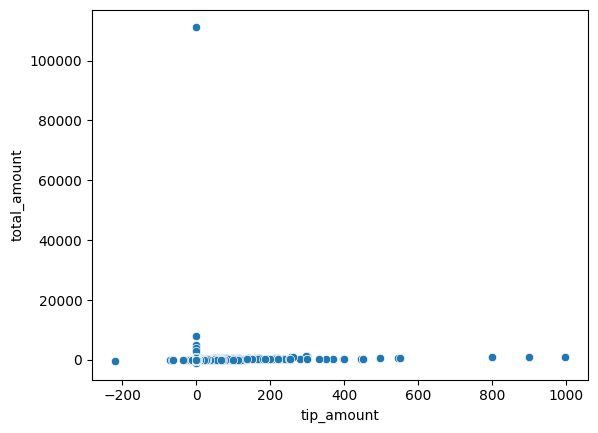

In [41]:
sns.scatterplot(data=df,x='tip_amount',y='total_amount')
plt.show()

#### **As shown above , the tip amount is not related to fare amount.**

## 20. Create a time series plot of the total `total_amount` collected for each day of January.

In [42]:
day_df=df.groupby(df['tpep_pickup_datetime'].dt.date)['total_amount'].sum().reset_index().rename(columns={'tpep_pickup_datetime':'Date'}).sort_values('Date')

In [43]:
day_df.head()

,Date,total_amount
0,2016-01-01,"5,395,870.11"
1,2016-01-02,"4,751,587.68"
2,2016-01-03,"4,875,951.65"
3,2016-01-04,"4,858,239.96"
4,2016-01-05,"5,180,636.93"


In [44]:
day_df['Date']=pd.to_datetime(day_df['Date'])
day_df['Day']=day_df['Date'].dt.day

In [45]:
day_df.dtypes

Date            datetime64[ns]
total_amount           float64
Day                      int32
dtype: object

In [46]:
day_df

,Date,total_amount,Day
0,2016-01-01,"5,395,870.11",1
1,2016-01-02,"4,751,587.68",2
2,2016-01-03,"4,875,951.65",3
3,2016-01-04,"4,858,239.96",4
4,2016-01-05,"5,180,636.93",5
5,2016-01-06,"5,268,924.71",6
6,2016-01-07,"5,582,943.98",7
7,2016-01-08,"5,941,840.24",8
8,2016-01-09,"5,815,694.21",9
9,2016-01-10,"5,335,276.92",10


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


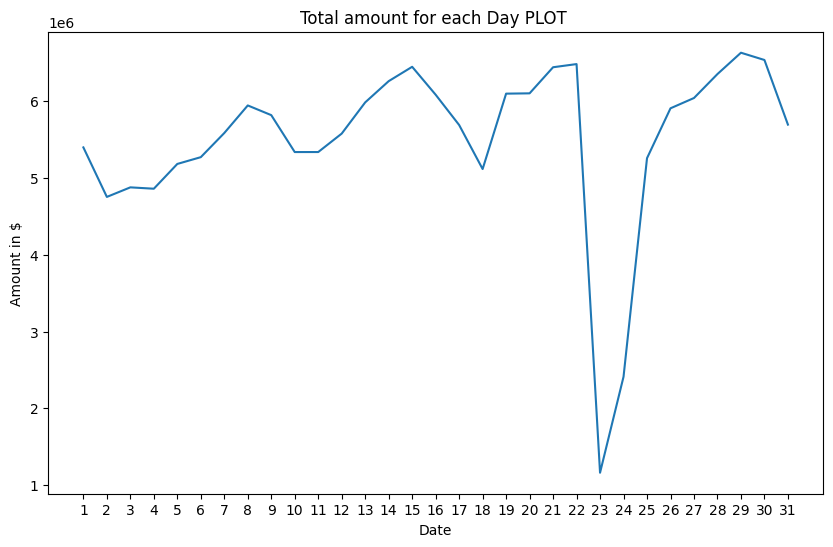

In [47]:
plt.figure(figsize=(10,6))
sns.lineplot(data=day_df,x='Day',y='total_amount')
plt.title('Total amount for each Day PLOT ')
plt.xlabel('Date')
plt.ylabel('Amount in $')
plt.xticks(ticks=range(1, 32), labels=range(1, 32))
plt.show()

## 21. Plot the distribution of `trip_distance`.

In [48]:
range_trip_dist=np.arange(df['trip_distance'].min(),df['trip_distance'].max()+1,10)
range_trip_dist

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [49]:
trip_list=[]
for x in range_trip_dist:
    trip_list.append(int(x))

trip_list

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


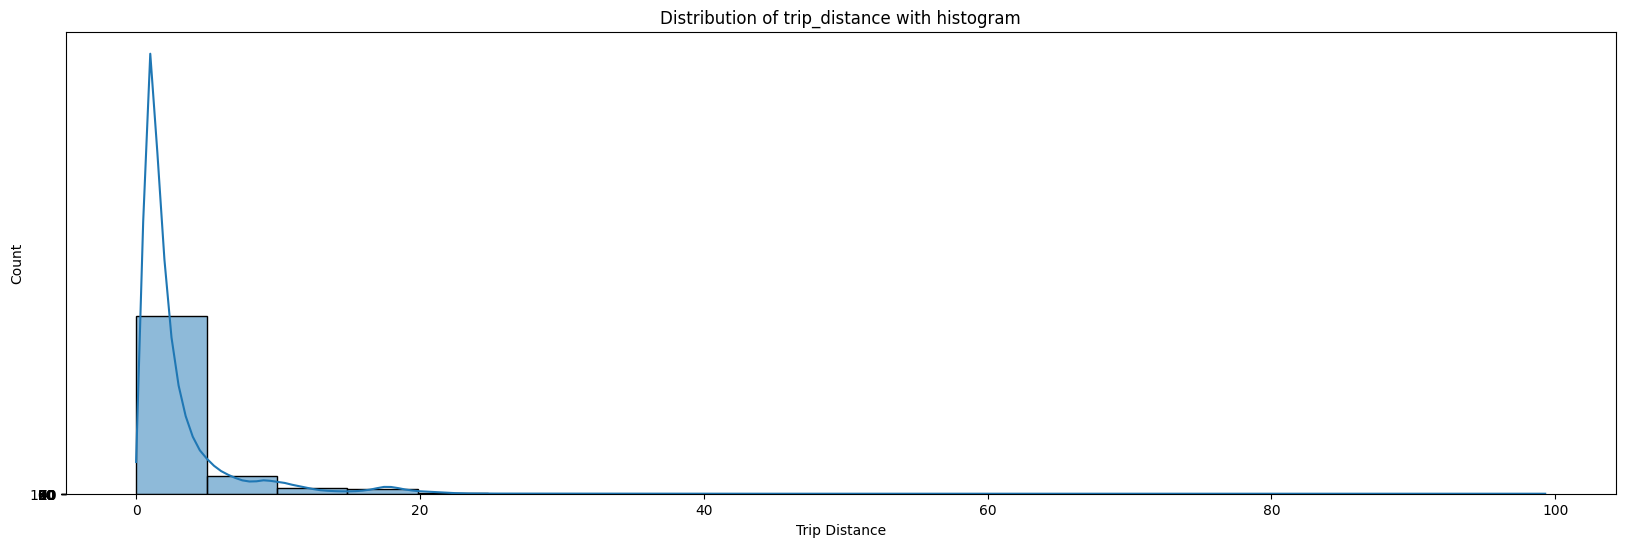

In [50]:
plt.figure(figsize=(20,6))
sns.histplot(df['trip_distance'],bins=20,kde=True)
plt.title('Distribution of trip_distance with histogram')
plt.yticks(ticks=trip_list,labels=trip_list)
plt.xlabel('Trip Distance')
plt.show()

## 22. Visualize the most frequent pickup locations using a scatter plot.

In [51]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point
0,2,2016-01-01,2016-01-01,2,1.10,-73.99,40.73,Standard rate,N,-73.98,...,Cash,7.50,0.50,0.50,0.00,0.00,0.30,8.80,"(-73.99037170410156, 40.73469543457031)","(-73.98184204101561, 40.73240661621094)"
1,2,2016-01-01,2016-01-01,5,4.90,-73.98,40.73,Standard rate,N,-73.94,...,Credit card,18.00,0.50,0.50,0.00,0.00,0.30,19.30,"(-73.98078155517578, 40.72991180419922)","(-73.94447326660156, 40.716678619384766)"
2,2,2016-01-01,2016-01-01,1,10.54,-73.98,40.68,Standard rate,N,-73.95,...,Credit card,33.00,0.50,0.50,0.00,0.00,0.30,34.30,"(-73.98455047607422, 40.6795654296875)","(-73.95027160644531, 40.78892517089844)"
3,2,2016-01-01,2016-01-01,1,4.75,-73.99,40.72,Standard rate,N,-73.96,...,Cash,16.50,0.00,0.50,0.00,0.00,0.30,17.30,"(-73.99346923828125, 40.71899032592773)","(-73.96224212646483, 40.65733337402344)"
4,2,2016-01-01,2016-01-01,3,1.76,-73.96,40.78,Standard rate,N,-73.98,...,Cash,8.00,0.00,0.50,0.00,0.00,0.30,8.80,"(-73.96062469482422, 40.78133010864258)","(-73.97726440429686, 40.75851440429688)"


In [52]:
pickup_cnt=df['pickup_point'].value_counts().reset_index()

In [53]:
pickup_cnt

,pickup_point,count
0,"(0.0, 0.0)",170117
1,"(-73.95466613769531, 40.82100296020508)",1022
2,"(-73.86331939697266, 40.769485473632805)",514
3,"(-73.79402923583984, 40.65670776367188)",123
4,"(-73.87445831298828, 40.774051666259766)",91
...,...,...
8211248,"(-73.97862243652342, 40.7616081237793)",1
8211249,"(-73.98719787597656, 40.71810150146485)",1
8211250,"(-73.97550964355469, 40.74918365478516)",1
8211251,"(-73.99586486816406, 40.723438262939446)",1


In [54]:
pickup_cnt=pickup_cnt[pickup_cnt['count']>1]
pickup_cnt.shape

(1603511, 2)

In [55]:
pickup_cnt.drop(index=0,inplace=True)
pickup_cnt.reset_index(drop=True,inplace=True)
pickup_cnt.shape

<ipython-input-55-467756a11b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_cnt.drop(index=0,inplace=True)


(1603510, 2)

In [56]:
pickup_cnt

,pickup_point,count
0,"(-73.95466613769531, 40.82100296020508)",1022
1,"(-73.86331939697266, 40.769485473632805)",514
2,"(-73.79402923583984, 40.65670776367188)",123
3,"(-73.87445831298828, 40.774051666259766)",91
4,"(-73.87448120117188, 40.774070739746094)",90
...,...,...
1603505,"(-73.97480773925781, 40.75638961791992)",2
1603506,"(-73.98470306396483, 40.75894927978516)",2
1603507,"(-73.99935913085938, 40.743919372558594)",2
1603508,"(-73.97367095947266, 40.7598876953125)",2


In [57]:
pickup_cnt['long']=pickup_cnt['pickup_point'].apply(lambda x:x[0])
pickup_cnt['lat']=pickup_cnt['pickup_point'].apply(lambda x:x[1])
pickup_cnt.head()

<ipython-input-57-7f735bbff053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_cnt['long']=pickup_cnt['pickup_point'].apply(lambda x:x[0])
<ipython-input-57-7f735bbff053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_cnt['lat']=pickup_cnt['pickup_point'].apply(lambda x:x[1])


,pickup_point,count,long,lat
0,"(-73.95466613769531, 40.82100296020508)",1022,-73.95,40.82
1,"(-73.86331939697266, 40.769485473632805)",514,-73.86,40.77
2,"(-73.79402923583984, 40.65670776367188)",123,-73.79,40.66
3,"(-73.87445831298828, 40.774051666259766)",91,-73.87,40.77
4,"(-73.87448120117188, 40.774070739746094)",90,-73.87,40.77


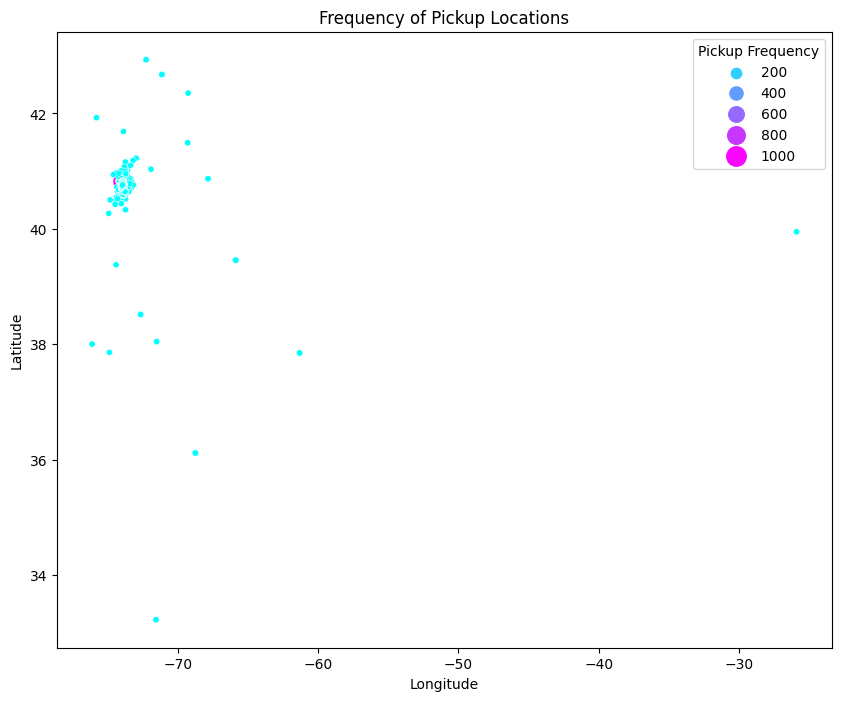

In [58]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=pickup_cnt,
    x='long',
    y='lat',
    size='count',
    hue='count',
    sizes=(20,200),
    palette='cool'
)

plt.title("Frequency of Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Pickup Frequency",loc="upper right")
plt.show()

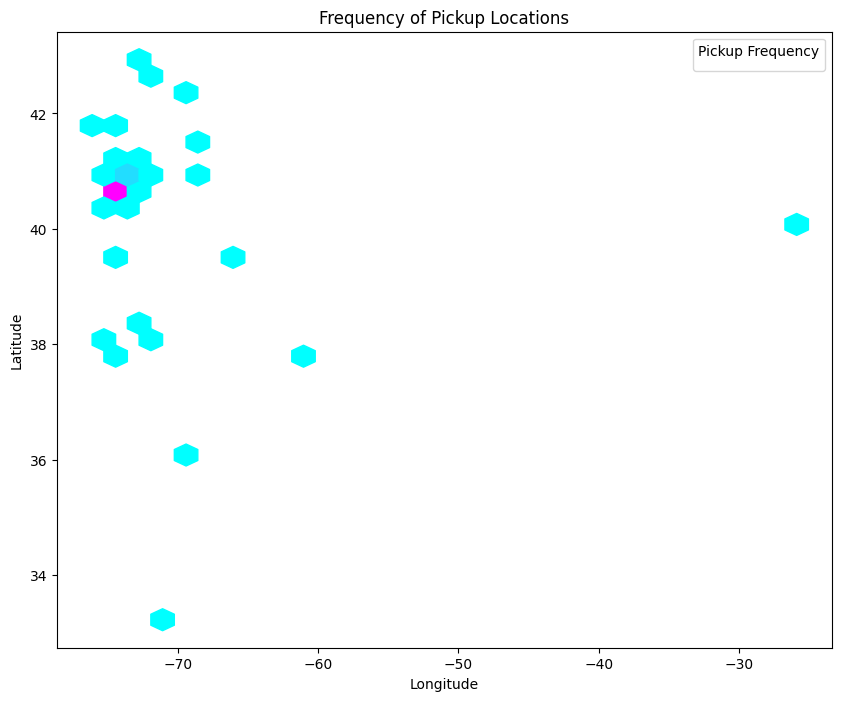

In [59]:
plt.figure(figsize=(10,8))
plt.hexbin(
    pickup_cnt['long'],pickup_cnt['lat'],
    C=pickup_cnt['count'],
    cmap='cool',
    gridsize=30,
    reduce_C_function=np.sum
)
plt.title("Frequency of Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Pickup Frequency",loc="upper right")
plt.show()

## 23. Plot a bar chart showing the average `total_amount` collected for each hour of the day.

In [60]:
hr_mean=df.groupby(df['tpep_pickup_datetime'].dt.hour)['total_amount'].mean()
hr_mean

tpep_pickup_datetime
0    16.40
1    15.94
2    15.74
3    16.30
4    18.31
5    19.93
6    16.12
7    14.69
8    14.69
9    14.75
10   14.93
11   14.83
12   14.82
13   15.27
14   16.04
15   15.84
16   16.39
17   16.00
18   15.27
19   15.06
20   15.49
21   15.86
22   16.26
23   16.73
Name: total_amount, dtype: float64

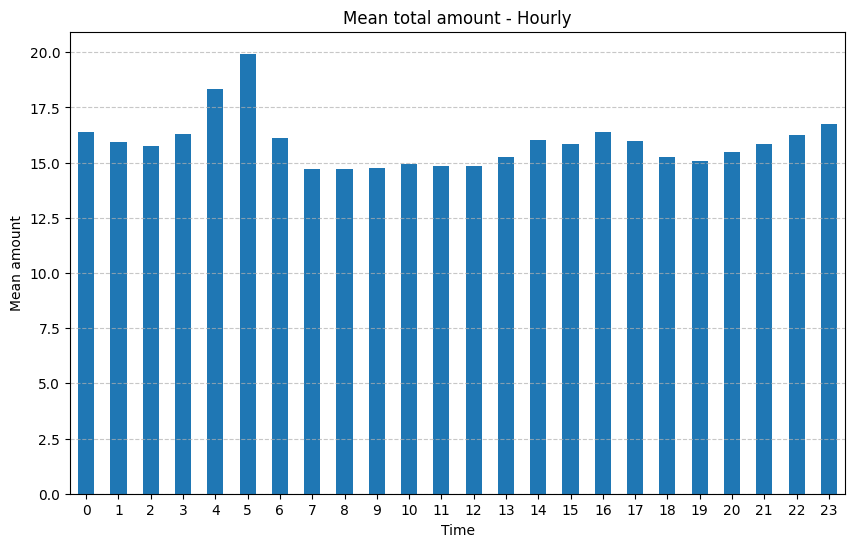

In [61]:
plt.figure(figsize=(10,6))
hr_mean.plot(
    kind='bar',
)
plt.title('Mean total amount - Hourly')
plt.xlabel('Time')
plt.ylabel('Mean amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 24. Test if the average `tip_amount` differs significantly between weekends and weekdays.

In [62]:
weekends_df=df[df['tpep_pickup_datetime'].dt.day_name().isin(['Saturday','Sunday'])]
weekends_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point
1056,1,2016-01-02 00:46:26,2016-01-02 00:52:40,2,0.70,-74.00,40.76,Standard rate,N,-73.99,...,Credit card,6.00,0.50,0.50,1.00,0.00,0.30,8.30,"(-73.99796295166014, 40.76055908203125)","(-73.9866714477539, 40.7550048828125)"
1057,1,2016-01-02 00:46:27,2016-01-02 00:58:35,1,4.40,-74.00,40.74,Standard rate,N,-73.97,...,Credit card,14.00,0.50,0.50,3.05,0.00,0.30,18.35,"(-74.00405883789062, 40.73818588256836)","(-73.97371673583984, 40.79133224487305)"
1058,1,2016-01-02 00:46:27,2016-01-02 01:00:16,1,3.10,-73.99,40.75,Standard rate,N,-73.99,...,Credit card,12.50,0.50,0.50,2.75,0.00,0.30,16.55,"(-73.99456787109375, 40.752403259277344)","(-73.99042510986328, 40.71910858154297)"
1059,2,2016-01-02 00:46:27,2016-01-02 00:52:29,2,1.11,-73.99,40.76,Standard rate,N,-73.98,...,Cash,6.00,0.50,0.50,0.00,0.00,0.30,7.30,"(-73.98554992675781, 40.75801849365234)","(-73.98086547851561, 40.76458358764648)"
1060,2,2016-01-02 00:46:27,2016-01-02 00:49:24,5,0.86,-73.99,40.76,Standard rate,N,-73.98,...,Cash,5.00,0.50,0.50,0.00,0.00,0.30,6.30,"(-73.98638916015625, 40.75667572021485)","(-73.9848403930664, 40.74822616577149)"


In [63]:
weekdays_df = df[
    df['tpep_pickup_datetime'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
]

In [64]:
weekdays_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point
0,2,2016-01-01,2016-01-01,2,1.10,-73.99,40.73,Standard rate,N,-73.98,...,Cash,7.50,0.50,0.50,0.00,0.00,0.30,8.80,"(-73.99037170410156, 40.73469543457031)","(-73.98184204101561, 40.73240661621094)"
1,2,2016-01-01,2016-01-01,5,4.90,-73.98,40.73,Standard rate,N,-73.94,...,Credit card,18.00,0.50,0.50,0.00,0.00,0.30,19.30,"(-73.98078155517578, 40.72991180419922)","(-73.94447326660156, 40.716678619384766)"
2,2,2016-01-01,2016-01-01,1,10.54,-73.98,40.68,Standard rate,N,-73.95,...,Credit card,33.00,0.50,0.50,0.00,0.00,0.30,34.30,"(-73.98455047607422, 40.6795654296875)","(-73.95027160644531, 40.78892517089844)"
3,2,2016-01-01,2016-01-01,1,4.75,-73.99,40.72,Standard rate,N,-73.96,...,Cash,16.50,0.00,0.50,0.00,0.00,0.30,17.30,"(-73.99346923828125, 40.71899032592773)","(-73.96224212646483, 40.65733337402344)"
4,2,2016-01-01,2016-01-01,3,1.76,-73.96,40.78,Standard rate,N,-73.98,...,Cash,8.00,0.00,0.50,0.00,0.00,0.30,8.80,"(-73.96062469482422, 40.78133010864258)","(-73.97726440429686, 40.75851440429688)"


In [65]:
mean_tip_weekend=weekends_df['tip_amount'].mean()
mean_tip_weekday=weekdays_df['tip_amount'].mean()

In [66]:
print(f"Mean tip amount on weekdays is around {round(mean_tip_weekday,2)} $")

Mean tip amount on weekdays is around 1.81 $


In [67]:
print(f"Mean tip amount on weekends is around {round(mean_tip_weekend,2)} $")

Mean tip amount on weekends is around 1.62 $


#### **So the tip amount difference for weekends and weekdays is small, with an amount difference of 0.19 $.** 

## 25. Analyze the correlation between `fare_amount`, `trip_distance`, and `trip duration`.

In [68]:
corr_df=trip_df[['fare_amount','trip_distance','trip_dur']].corr()
corr_df

,fare_amount,trip_distance,trip_dur
fare_amount,1.00,0.28,0.21
trip_distance,0.28,1.00,0.67
trip_dur,0.21,0.67,1.00


<Axes: >

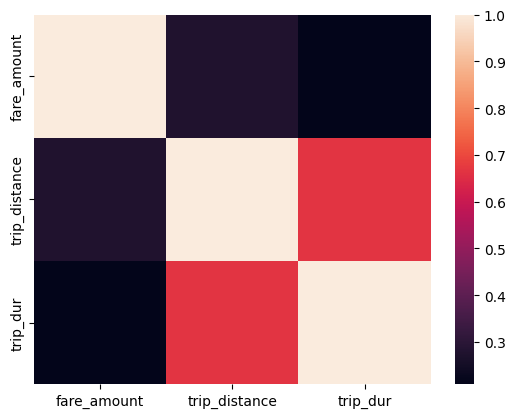

In [69]:
sns.heatmap(corr_df)

# Predition Models 

#### **Prediction of the 'fare amount' based on specific columns**

In [70]:
col_list=list(df.columns)
col_list

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RatecodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'pickup_point',
 'dropoff_point']

In [71]:
target_col='total_amount'
inde_col=[col for col in col_list if col!=target_col]
print(inde_col)

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'pickup_point', 'dropoff_point']


In [72]:
int_cols=[col for col in inde_col if df[col].dtypes != 'object']

In [73]:
for column in int_cols:
    corr_col=df[target_col].corr(df[column])
    print(f'Correlation with {column} = {corr_col}')

Correlation with VendorID = 0.004534767747910784
Correlation with tpep_pickup_datetime = 0.010175401289710832
Correlation with tpep_dropoff_datetime = 0.010413227393395553
Correlation with passenger_count = 0.002438703487432246
Correlation with trip_distance = 0.32968022163630795
Correlation with pickup_longitude = 0.004442832076273602
Correlation with pickup_latitude = -0.004290211154177734
Correlation with dropoff_longitude = 0.0028710304962024503
Correlation with dropoff_latitude = -0.002860692462602921
Correlation with fare_amount = 0.9953760732579031
Correlation with extra = -0.012092571003038552
Correlation with mta_tax = -0.03705242291891792
Correlation with tip_amount = 0.2504238539112062
Correlation with tolls_amount = 0.21326049435543135
Correlation with improvement_surcharge = 0.012717802103142987


In [74]:
obj_cols=[col for col in inde_col if df[col].dtypes=='object']
print(obj_cols)

['RatecodeID', 'store_and_fwd_flag', 'payment_type', 'pickup_point', 'dropoff_point']


In [75]:
df.drop(['pickup_point','dropoff_point','tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1,inplace=True)

In [76]:
df.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2,1.10,-73.99,40.73,Standard rate,N,-73.98,40.73,Cash,7.50,0.50,0.50,0.00,0.00,0.30,8.80
1,2,5,4.90,-73.98,40.73,Standard rate,N,-73.94,40.72,Credit card,18.00,0.50,0.50,0.00,0.00,0.30,19.30
2,2,1,10.54,-73.98,40.68,Standard rate,N,-73.95,40.79,Credit card,33.00,0.50,0.50,0.00,0.00,0.30,34.30
3,2,1,4.75,-73.99,40.72,Standard rate,N,-73.96,40.66,Cash,16.50,0.00,0.50,0.00,0.00,0.30,17.30
4,2,3,1.76,-73.96,40.78,Standard rate,N,-73.98,40.76,Cash,8.00,0.00,0.50,0.00,0.00,0.30,8.80


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
col_for_encodings=[col for col in list(df.columns) if df[col].dtype == 'object']
col_for_encodings

['RatecodeID', 'store_and_fwd_flag', 'payment_type']

In [79]:
encoding_maps={}

for col in col_for_encodings:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    encoding_maps[col]=dict(zip(le.classes_,le.transform(le.classes_)))

df.dtypes

VendorID                   int64
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag         int64
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [80]:
encoding_maps

{'RatecodeID': {'Group ride': 0,
  'JFK': 1,
  'Nassau or Westchester': 2,
  'Negotiated fare': 3,
  'Newark': 4,
  'Standard rate': 5},
 'store_and_fwd_flag': {'N': 0, 'Y': 1},
 'payment_type': {'Cash': 0,
  'Credit card': 1,
  'Dispute': 2,
  'No charge': 3,
  'Unknown': 4}}

## Spliting the dataset

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
df1=df.copy()

In [83]:
df1=df1[df1['total_amount']>0]

fare_amount	extra	mta_tax	tip_amount	tolls_amount	improvement_surcharge

In [84]:
df1=df1[ (df1['fare_amount']>0) | (df1['extra']>0) | (df1['mta_tax']>0) | (df1['tolls_amount']>0) | (df1['improvement_surcharge']>0)]

In [85]:
y=df1['total_amount']
x=df1.drop(columns = ['total_amount'])

In [86]:
X_train,X_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.33)

In [87]:
print(f'Shape of X_train : {X_train.shape} and Shape of y_train : {y_train.shape}')

Shape of X_train : (8721276, 16) and Shape of y_train : (8721276,)


In [88]:
print(f'Shape of X_val : {X_val.shape} and Shape of y_val : {y_val.shape}')

Shape of X_val : (1460813, 16) and Shape of y_val : (1460813,)


In [89]:
print(f'Shape of X_test : {X_test.shape} and Shape of y_test : {y_test.shape}')

Shape of X_test : (719506, 16) and Shape of y_test : (719506,)


## 1. Neural network

In [90]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [91]:
nn_model=Sequential([
    Dense(128,activation='relu',input_dim=16),
    Dropout(0.3),
    
    Dense(64,activation='relu'),
    Dropout(0.2),
    
    Dense(32,activation='relu'),
    Dropout(0.3),
    
    Dense(16,activation='relu'),
    Dropout(0.3),

    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
nn_model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [93]:
history=nn_model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/10
68135/68135 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - loss: 66.0096 - mse: 66.0096 - val_loss: 11.3947 - val_mse: 11.3947
Epoch 2/10
68135/68135 ━━━━━━━━━━━━━━━━━━━━ 134s 2ms/step - loss: 19.9424 - mse: 19.9424 - val_loss: 3.4698 - val_mse: 3.4698
Epoch 3/10
68135/68135 ━━━━━━━━━━━━━━━━━━━━ 135s 2ms/step - loss: 39.1376 - mse: 39.1376 - val_loss: 5.8434 - val_mse: 5.8434
Epoch 4/10
68135/68135 ━━━━━━━━━━━━━━━━━━━━ 129s 2ms/step - loss: 71.1884 - mse: 71.1884 - val_loss: 3.3718 - val_mse: 3.3718
Epoch 5/10
68135/68135 ━━━━━━━━━━━━━━━━━━━━ 132s 2ms/step - loss: 117.4938 - mse: 117.4938 - val_loss: 3.0308 - val_mse: 3.0308
Epoch 6/10
68135/68135 ━━━━━━━━━━━━━━━━━━━━ 134s 2ms/step - loss: 68.7831 - mse: 68.7831 - val_loss: 3.9168 - val_mse: 3.9168
Epoch 7/10
68135/68135 ━━━━━━━━━━━━━━━━━━━━ 130s 2ms/step - loss: 255.9003 - mse: 255.9003 - val_loss: 4.2918 - val_mse: 4.2918
Epoch 8/10
68135/68135 ━━━━━━━━━━━━━━━━━━━━ 131s 2ms/step - loss: 26.8842 - mse: 26.8842 - val_loss: 5.3839 - va

In [94]:
y_pred=nn_model.predict(X_test)

22485/22485 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


In [95]:
nn_mse=mean_squared_error(y_test,y_pred)
nn_rmse=np.sqrt(nn_mse)

print(f'Mean Square Error : {nn_mse}')
print(f'Root Mean Squared Error : {nn_rmse}')

Mean Square Error : 6.565416659687902
Root Mean Squared Error : 2.5623069019319096


## 2. Using the polynomial regression for the prediction

In [96]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [97]:
train_data=lgb.Dataset(X_train,label=y_train)
test_data=lgb.Dataset(X_test,label=y_test,reference=train_data)
val_data=lgb.Dataset(X_val,label=y_val,reference=train_data)

In [98]:
params={
    'objective':'regression',
    'metric':'rmse',
    'learning_rate':0.0001,
    'num_leaves':41
}

In [99]:
model=lgb.train(params, train_data, valid_sets=[val_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.222385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 8721276, number of used features: 16
[LightGBM] [Info] Start training from score 15.655492


In [100]:
y_pred=model.predict(X_test)

In [101]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(f'Mean Square Error : {mse}')
print(f'Root Mean Squared Error : {rmse}')

Mean Square Error : 188.9816979586464
Root Mean Squared Error : 13.747061429943725


In [102]:
nn_model.save('fare_prediction.h5')